In [34]:
!pip install python-binance
!pip install statsmodels
!pip install sklearn
!pip install statsmodels
!pip install pylab
!pip install keras
!pip install plotly
!pip install pmdarima

ERROR: Could not find a version that satisfies the requirement pylab (from versions: none)
ERROR: No matching distribution found for pylab


In [35]:
from binance.client import Client
client = Client('c0U5cl8MFsIkNLHjmWsySmzwyfeWP21yWvgod9CmArRXT8BKDPrBVMJm87JaLvYE', 'tBAuWAZwkblRhnLFyWgC0kgbpQ5WKebaM1X1vLhFlYTQNaFgD4EEVctrOs2r4hhI')

# get market depth
depth = client.get_order_book(symbol='BNBBTC')

prices = client.get_all_tickers()


In [36]:
matching = [s for s in prices if "ADA" in s]

In [37]:
klines = client.get_historical_klines("ADAUSDT", Client.KLINE_INTERVAL_1MINUTE, "1 day ago UTC")
#lines = client.get_historical_klines("BNBBTC", Client.KLINE_INTERVAL_1MINUTE, "1 day ago UTC")


In [38]:
btc_price = client.get_symbol_ticker(symbol="ADAUSDT")
# print full output (dictionary)
print(btc_price)

{'symbol': 'ADAUSDT', 'price': '2.21330000'}


In [39]:
timestamp = client._get_earliest_valid_timestamp('BTCUSDT', '1d')
print(timestamp)

1502928000000


In [40]:
bars = client.get_historical_klines('ADAUSDT', '1d', timestamp)

In [41]:
bars

[[1523923200000,
  '0.25551000',
  '0.28800000',
  '0.23983000',
  '0.24260000',
  '67462293.24000000',
  1524009599999,
  '17411823.57157960',
  42568,
  '28228665.39000000',
  '7281513.06137010',
  '0'],
 [1524009600000,
  '0.24260000',
  '0.26460000',
  '0.24201000',
  '0.26200000',
  '31328095.79000000',
  1524095999999,
  '7922134.28304330',
  21684,
  '15082512.84000000',
  '3818068.82632840',
  '0'],
 [1524096000000,
  '0.26199000',
  '0.27500000',
  '0.25777000',
  '0.27004000',
  '50859980.22000000',
  1524182399999,
  '13609907.89978870',
  32600,
  '23934593.69000000',
  '6408750.31190170',
  '0'],
 [1524182400000,
  '0.27004000',
  '0.30442000',
  '0.26648000',
  '0.30108000',
  '71084276.49000000',
  1524268799999,
  '20270887.70351350',
  46506,
  '35262790.18000000',
  '10040840.12777730',
  '0'],
 [1524268800000,
  '0.30161000',
  '0.30700000',
  '0.26509000',
  '0.28668000',
  '92719842.91000000',
  1524355199999,
  '26539390.12720960',
  55256,
  '43517191.79000000',


In [42]:
from datetime import datetime
dt = []
for i in range(0,len(bars)):
    dt_object = datetime.fromtimestamp(int(bars[i][0])/1000)
    dt.append(dt_object.strftime("%Y-%m-%d"))

In [43]:
dt_object

datetime.datetime(2021, 5, 15, 20, 0)

In [44]:
print(type(dt[0]))

<class 'str'>


In [45]:
for line in bars:
    del line[5:]

In [46]:
import pandas as pd
btc_df = pd.DataFrame(bars, columns=['date', 'open', 'high', 'low', 'close'])
btc_df['date'] = dt
#btc_df.set_index('date', inplace=True)
#print(btc_df.head())
#btc_df = (df['date'] > '2020-12-31')
#btc_df=df.loc[btc_df]
print(btc_df.head())

         date        open        high         low       close
0  2018-04-16  0.25551000  0.28800000  0.23983000  0.24260000
1  2018-04-17  0.24260000  0.26460000  0.24201000  0.26200000
2  2018-04-18  0.26199000  0.27500000  0.25777000  0.27004000
3  2018-04-19  0.27004000  0.30442000  0.26648000  0.30108000
4  2018-04-20  0.30161000  0.30700000  0.26509000  0.28668000


In [47]:
btc_df[['open', 'high', 'low', 'close']] = btc_df[['open', 'high', 'low', 'close']].apply(pd.to_numeric, errors='ignore')

In [48]:
btc_df['date'] = pd.to_datetime(btc_df['date']).dt.date

In [49]:
btc_df.dtypes

date      object
open     float64
high     float64
low      float64
close    float64
dtype: object

In [50]:
from datetime import datetime


dt_object = datetime.fromtimestamp(int(timestamp)/1000)

print("dt_object =", dt_object)
print("type(dt_object) =", type(dt_object))

dt_object = 2017-08-16 20:00:00
type(dt_object) = <class 'datetime.datetime'>


In [51]:
from datetime import datetime

# current date and time
now = datetime.now()

timestamp = datetime.timestamp(now)
print("timestamp =", timestamp)

timestamp = 1621205424.58147


In [52]:
import plotly.graph_objects as go

import pandas as pd
from datetime import datetime


fig = go.Figure(data=[go.Candlestick(x=btc_df['date'],
                open=btc_df['open'],
                high=btc_df['high'],
                low=btc_df['low'],
                close=btc_df['close'])])
fig.update_layout(
    title="Increase in $ over the years for ADA",
    xaxis_title="Years",
    yaxis_title="Amount in USD",
)

fig.show()

# Seasonality in data

<ipython-input-53-00deb48f53b6>:10: FutureWarning:

the 'freq'' keyword is deprecated, use 'period' instead



<Figure size 432x288 with 0 Axes>

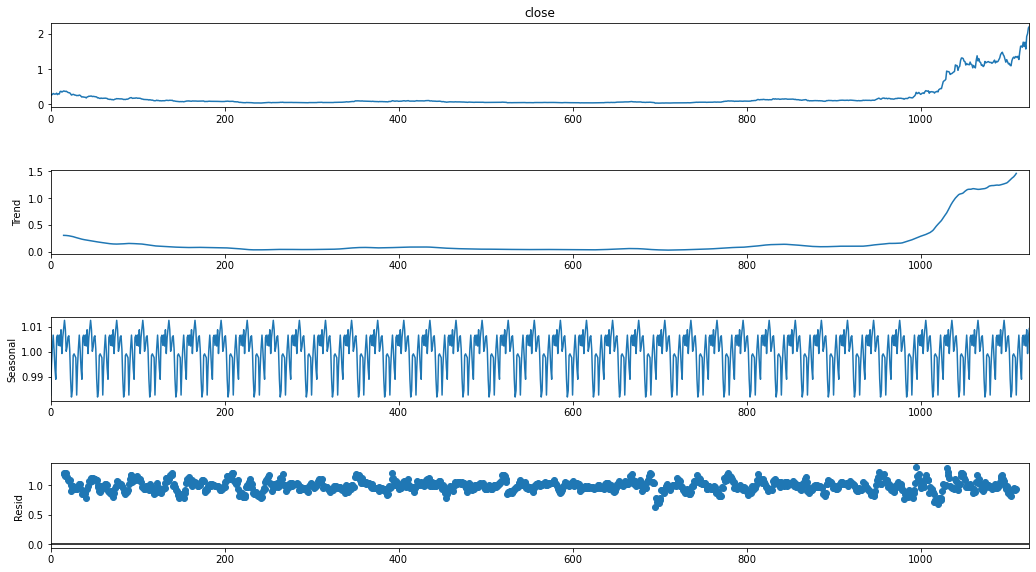

In [53]:
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import numpy as np

result = seasonal_decompose(btc_df['close'], model='multiplicative', freq = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

No handles with labels found to put in legend.


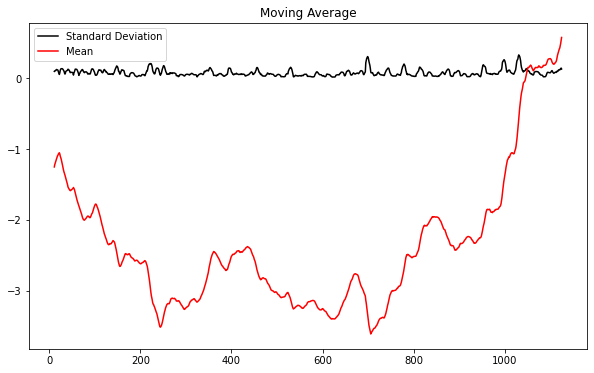

In [54]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(btc_df['close'])
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

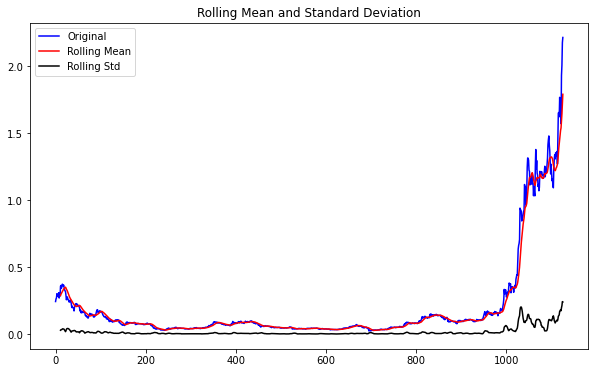

Results of dickey fuller test
Test Statistics                   4.092074
p-value                           1.000000
No. of lags used                 22.000000
Number of observations used    1103.000000
critical value (1%)              -3.436293
critical value (5%)              -2.864164
critical value (10%)             -2.568167
dtype: float64


In [55]:
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(btc_df['close'])

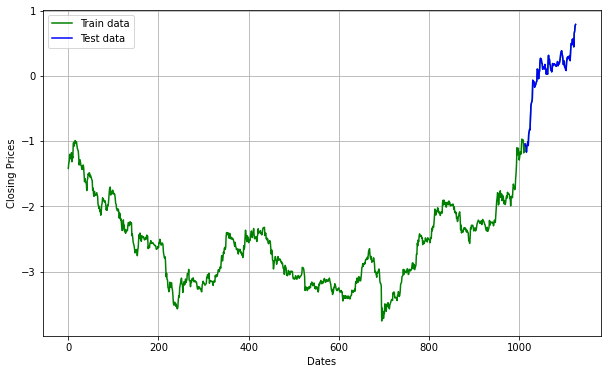

In [56]:
#split data into train and training set
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

In [57]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find             optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-2897.897, Time=3.25 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-2903.369, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-2902.248, Time=0.45 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-2899.891, Time=0.17 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-2908.468, Time=0.22 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-2906.989, Time=0.21 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-2907.380, Time=0.16 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-2905.667, Time=0.54 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-2905.703, Time=1.44 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-2910.461, Time=0.15 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-2905.362, Time=0.08 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=-2908.983, Time=0.19 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-2909.375, Time=0.20 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-2907.660, Time=0.44 sec
 ARIMA(3,1,1)(0,0,0

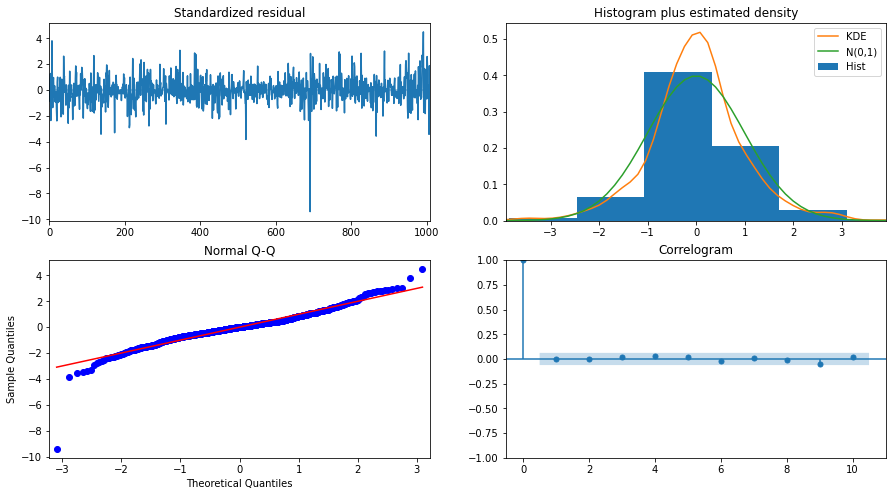

In [58]:
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

# Arima 

In [59]:
model = ARIMA(train_data, order=(3, 1, 2))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

C:\Users\venkataraman.k\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)




                             ARIMA Model Results                              
Dep. Variable:                D.close   No. Observations:                 1009
Model:                 ARIMA(3, 1, 2)   Log Likelihood                1459.182
Method:                       css-mle   S.D. of innovations              0.057
Date:                Sun, 16 May 2021   AIC                          -2904.363
Time:                        18:51:18   BIC                          -2869.946
Sample:                             1   HQIC                         -2891.288
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0002      0.002      0.096      0.924      -0.004       0.005
ar.L1.D.close     1.1949      0.612      1.952      0.051      -0.005       2.394
ar.L2.D.close    -0.1116      0.477     

C:\Users\venkataraman.k\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)




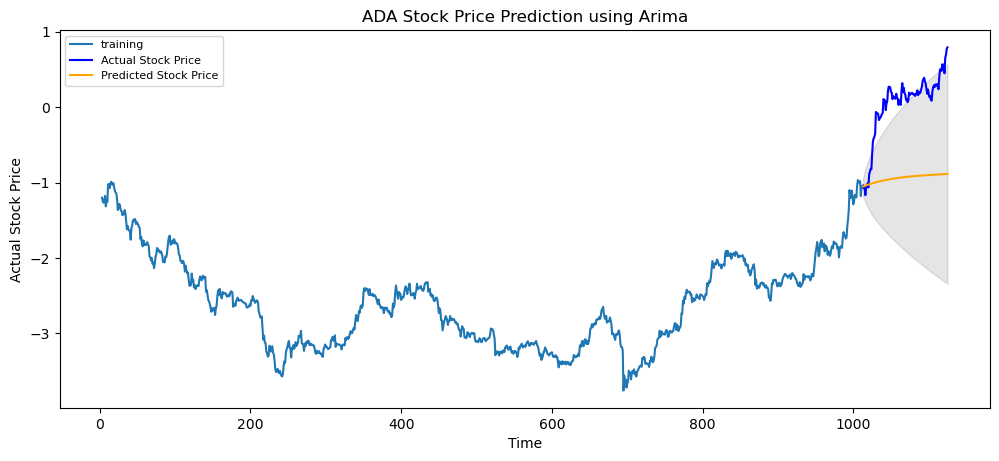

In [60]:
# Forecast
fc, se, conf = fitted.forecast(113, alpha=0.05)  # 95% confidence
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('ADA Stock Price Prediction using Arima')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# RMSE form Arima model

In [61]:
# report performance
mse = mean_squared_error(test_data, fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - test_data)/np.abs(test_data))
print('MAPE: '+str(mape))

MSE: 1.1209299105229336
MAE: 0.9922628859413671
RMSE: 1.0587397746958096
MAPE: 6.325370648716245


# Holt Winters

In [62]:
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   
from statsmodels.tsa.holtwinters import ExponentialSmoothing

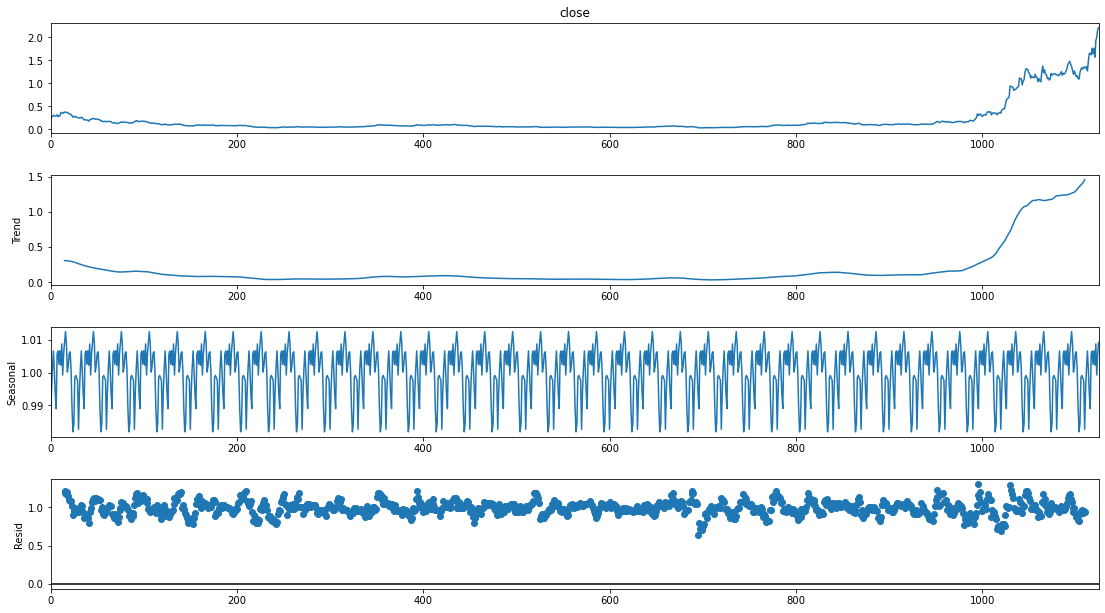

In [63]:
decompose_result = seasonal_decompose(btc_df['close'],model='multiplicative', period=30)
fig = decompose_result.plot()
fig.set_size_inches(16,9)

In [64]:
btc_df.index.freq = 'MS'
# Set the value of Alpha and define m (Time Period)
m = 12
alpha = 1/(2*m)

C:\Users\venkataraman.k\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning:

After 0.13 initialization must be handled at model creation



Text(0, 0.5, 'Close Values')

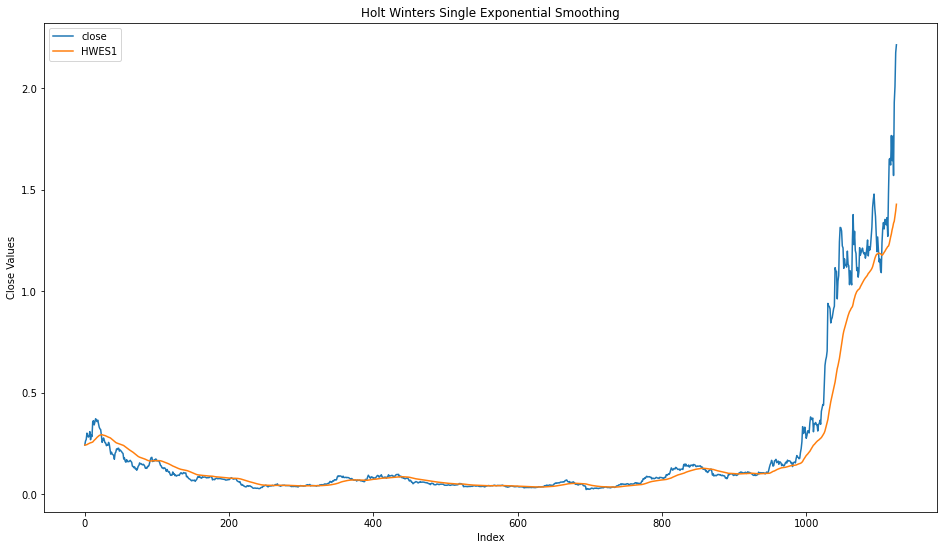

In [65]:
btc_df['HWES1'] = SimpleExpSmoothing(np.asarray(btc_df.close)).fit(smoothing_level=alpha,optimized=False,use_brute=True).fittedvalues
btc_df[['close','HWES1']].plot(title='Holt Winters Single Exponential Smoothing', figsize=(16,9));
plt.xlabel("Index")
plt.ylabel("Close Values")

C:\Users\venkataraman.k\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning:

After 0.13 initialization must be handled at model creation



Text(0, 0.5, 'Close Values')

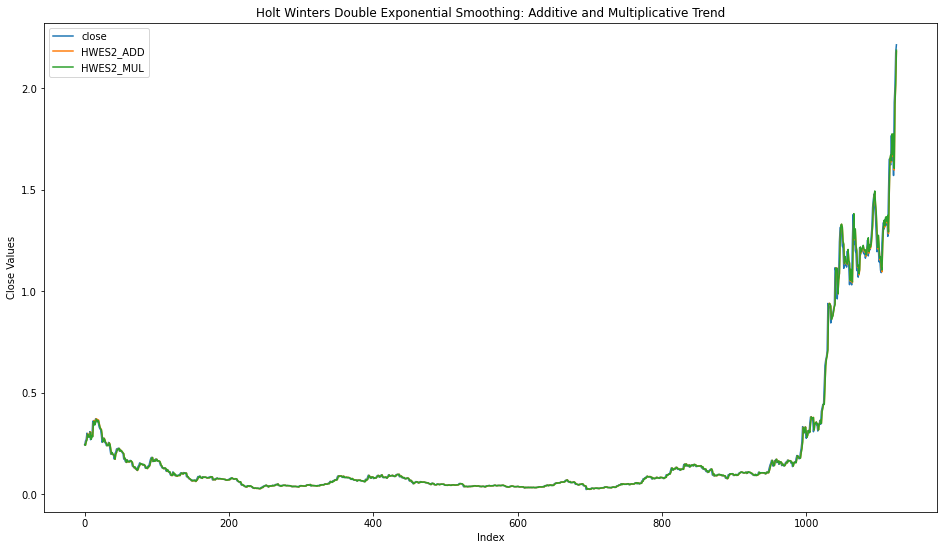

In [66]:
btc_df['HWES2_ADD'] = ExponentialSmoothing(np.asarray(btc_df.close),trend='add').fit().fittedvalues
btc_df['HWES2_MUL'] = ExponentialSmoothing(np.asarray(btc_df.close),trend='mul').fit().fittedvalues
btc_df[['close','HWES2_ADD','HWES2_MUL']].plot(title='Holt Winters Double Exponential Smoothing: Additive and Multiplicative Trend', figsize=(16,9))
plt.xlabel("Index")
plt.ylabel("Close Values")

C:\Users\venkataraman.k\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning:

After 0.13 initialization must be handled at model creation

C:\Users\venkataraman.k\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning:

overflow encountered in matmul



Text(0, 0.5, 'Close Values')

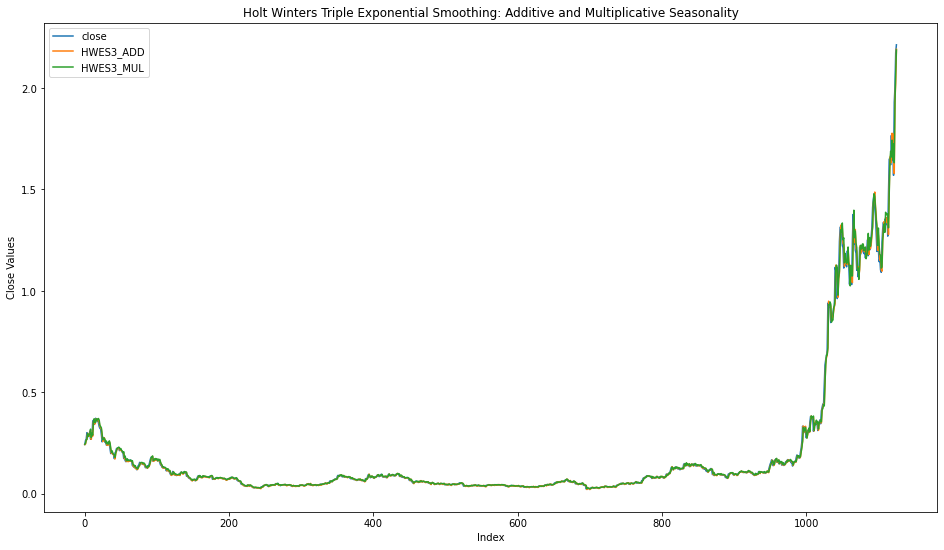

In [67]:
btc_df['HWES3_ADD'] = ExponentialSmoothing(btc_df['close'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues
btc_df['HWES3_MUL'] = ExponentialSmoothing(btc_df['close'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues
btc_df[['close','HWES3_ADD','HWES3_MUL']].plot(title='Holt Winters Triple Exponential Smoothing: Additive and Multiplicative Seasonality', figsize=(16,9))
plt.xlabel("Index")
plt.ylabel("Close Values")

In [68]:
btc_df.index.freq = 'MS'
train = btc_df.iloc[:-500]
test = btc_df.iloc[-500:]

C:\Users\venkataraman.k\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning:

After 0.13 initialization must be handled at model creation

C:\Users\venkataraman.k\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning:

overflow encountered in matmul



Text(0, 0.5, 'Close Values')

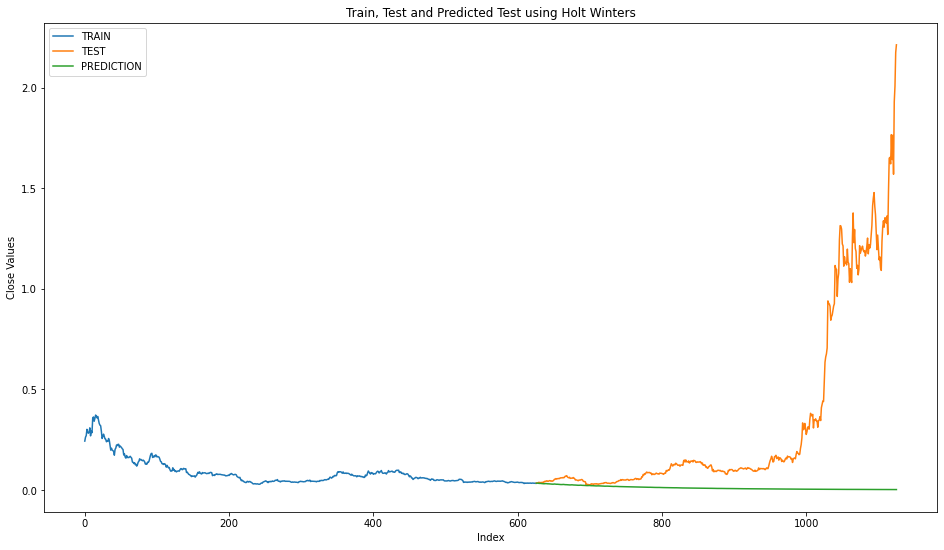

In [69]:
fitted_model = ExponentialSmoothing(train['close'],trend='mul',seasonal='mul',seasonal_periods=12).fit()
test_predictions = fitted_model.predict(start=test.index[0], end=test.index[-1])#(steps=500)
train['close'].plot(legend=True,label='TRAIN',figsize=(16,9))
test['close'].plot(legend=True,label='TEST',figsize=(16,9))
test_predictions.plot(legend=True,label='PREDICTION')
plt.title('Train, Test and Predicted Test using Holt Winters')
plt.xlabel("Index")
plt.ylabel("Close Values")

<AxesSubplot:>

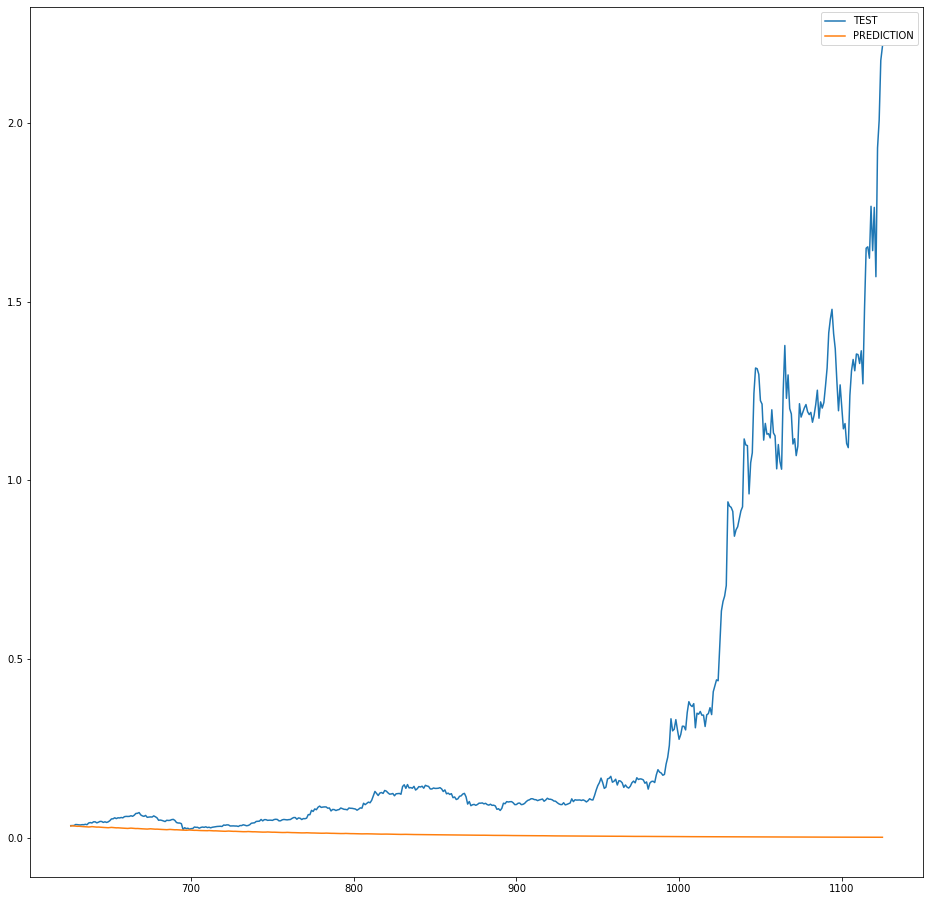

In [70]:
test['close'].plot(legend=True,label='TEST',figsize=(16,16))
test_predictions.plot(legend=True,label='PREDICTION')

In [71]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
import math
print('Mean Absolute Error =', mean_absolute_error(test['close'],test_predictions))
print('Mean Squared Error =', mean_squared_error(test['close'],test_predictions))
rmse = mean_squared_error(test['close'],test_predictions)
rmse = math.sqrt(rmse)
print("RMSE:",rmse)

Mean Absolute Error = 0.3218476423761249
Mean Squared Error = 0.328291606170573
RMSE: 0.5729673692022723


# Using LSTM

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
import numpy as np
btc_df

In [ ]:
#creating dataframe
data = btc_df
new_data = pd.DataFrame(index=range(0,len(btc_df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['date'][i]
    new_data['Close'][i] = data['close'][i]
new_data

In [ ]:
#creating train and test sets
#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)
dataset = new_data.values
train = dataset[0:987,:]
valid = dataset[987:,:]
#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

In [ ]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

In [ ]:
x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

In [ ]:
#predicting 246 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

In [ ]:
X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

In [ ]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

In [ ]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

In [ ]:
import matplotlib.pyplot as plt 

#for plotting
train = new_data[:987]
valid = new_data[987:]
valid['Predictions'] = closing_price
plt.plot(train['Close'])
plt.plot(valid['Close'],label='Actual Closing value')
plt.plot(valid['Predictions'],label='Actual Predicted closing price')

plt.legend(loc='upper left', fontsize=8)